In [1]:
#Description: This program uses an artificial recurrent neural network called Long Short Term Memory (LSTM)
#             to predict the closing stock price of a corporation using the past 100 day stock price.

In [99]:
#Import the libraries
import pandas as pd
from pandas_datareader import data as pdr
import yfinance as yfin
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM

2023-01-31 18:12:22.510043: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [69]:
#Define date range
start = '2010-01-01'
end = '2019-12-31'

#Get stock quote
yfin.pdr_override()

df = pdr.get_data_yahoo('AAPL',start,end)
#df = pd.DataFrame(df)

#Show the data
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,7.622500,7.660714,7.585000,7.643214,6.515211,493729600
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.526476,601904800
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.422665,552160000
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.410790,477131200
2010-01-08,7.510714,7.571429,7.466429,7.570714,6.453411,447610800


In [70]:
#Clean the dataframe by dropping useless columns

df = df.reset_index()
df = df.drop(columns=['Date'], axis = 1)
df = df.drop(columns=['Adj Close'], axis = 1)
df.head()

,Open,High,Low,Close,Volume
0,7.622500,7.660714,7.585000,7.643214,493729600
1,7.664286,7.699643,7.616071,7.656429,601904800
2,7.656429,7.686786,7.526786,7.534643,552160000
3,7.562500,7.571429,7.466071,7.520714,477131200
4,7.510714,7.571429,7.466429,7.570714,447610800


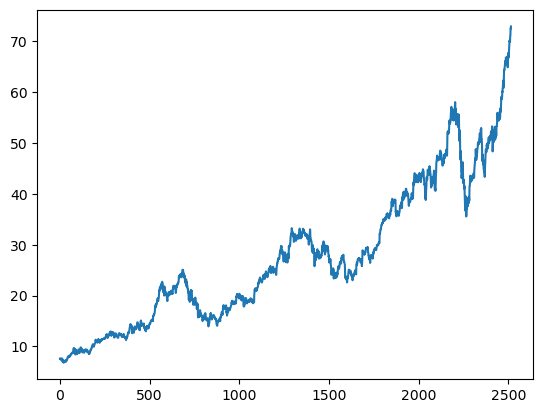

In [73]:
plt.plot(df.Close)

In [79]:
#Moving averages (average of a particular time frame) for 100 and 200 days
ma100 = df.Close.rolling(100).mean()
ma200 = df.Close.rolling(200).mean()

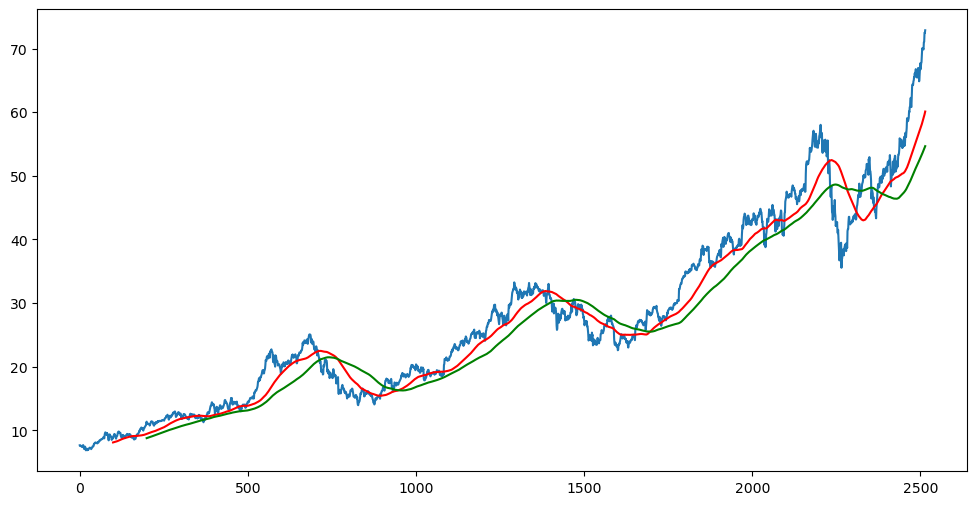

In [81]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')

In [82]:
df.shape

(2515, 5)

In [85]:
#Splitting Data into training and testing set

data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70):])

print(data_training.shape)
print(data_testing.shape)

(1760, 1)
(755, 1)


In [87]:
#All the values are scaled in values between 0 and 1
scaler = MinMaxScaler(feature_range=(0,1))

In [88]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.02971782],
       [0.03021854],
       [0.02560389],
       ...,
       [0.84388656],
       [0.85089656],
       [0.84616011]])

In [131]:
#for each closing price in y_train we associate the 100 previous closing price in x_train, 
#which will be our independent variable
x_train = np.array([data_training_array[i-100:i] for i in range(100,data_training_array.shape[0])])
y_train = np.array([data_training_array[i,0] for i in range(100,data_training_array.shape[0])])
print(x_train.shape)

(1660, 100, 1)


In [133]:
#ML Model
model = Sequential()
#First layer
model.add(LSTM(units = 50, activation='relu', return_sequences=True, 
               input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))

#Second layer
model.add(LSTM(units = 60, activation='relu', return_sequences=True))
model.add(Dropout(0.3))

#Third layer
model.add(LSTM(units = 80, activation='relu', return_sequences=True))
model.add(Dropout(0.4))

#Fourth layer
model.add(LSTM(units = 120, activation='relu'))
model.add(Dropout(0.5))

#Predicted value
model.add(Dense(units = 1))

In [134]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 100, 50)           10400     
                                                                 
 dropout_4 (Dropout)         (None, 100, 50)           0         
                                                                 
 lstm_5 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_5 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_6 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_6 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_7 (LSTM)               (None, 120)              

In [135]:
#Compile the model
model.compile(optimizer='adam', loss = 'mean_squared_error') #choose loss function (MSE)
model.fit(x_train, y_train, epochs = 50)

Epoch 1/50
52/52 [==============================] - 17s 241ms/step - loss: 0.0879
Epoch 2/50
52/52 [==============================] - 12s 240ms/step - loss: 0.0164
Epoch 3/50
52/52 [==============================] - 13s 249ms/step - loss: 0.0123
Epoch 4/50
52/52 [==============================] - 13s 258ms/step - loss: 0.0108
Epoch 5/50
52/52 [==============================] - 13s 256ms/step - loss: 0.0101
Epoch 6/50
52/52 [==============================] - 14s 268ms/step - loss: 0.0093
Epoch 7/50
52/52 [==============================] - 14s 270ms/step - loss: 0.0095
Epoch 8/50
52/52 [==============================] - 16s 302ms/step - loss: 0.0084
Epoch 9/50
52/52 [==============================] - 14s 278ms/step - loss: 0.0089
Epoch 10/50
52/52 [==============================] - 14s 277ms/step - loss: 0.0084
Epoch 11/50
52/52 [==============================] - 15s 279ms/step - loss: 0.0077
Epoch 12/50
52/52 [==============================] - 15s 280ms/step - loss: 0.0079
Epoch 13/50
5

In [1]:
model.save('keras_model.h5')

NameError: name 'model' is not defined

In [137]:
data_testing.head()

,Close
1760,29.182501
1761,28.955000
1762,29.037500
1763,29.004999
1764,29.152500


In [138]:
#To predict the value for testing data, we need the previous 100 dates for each entry,
#so we need to add data from data_training
past_100_days = data_training.tail(100)
final_df = past_100_days.append(data_testing, ignore_index = True)
final_df.head()

/var/folders/pq/60k1kqqn47j9qs8l3yf05hw00000gp/T/ipykernel_40594/1246319646.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = past_100_days.append(data_testing, ignore_index = True)


,Close
0,27.092501
1,27.202499
2,27.000000
3,26.982500
4,27.045000


In [139]:
input_data = scaler.fit_transform(final_df) #data scaled in range(0,1)
input_data.shape

(855, 1)

In [140]:
#Same as for train data
x_test = np.array([data_training_array[i-100:i] for i in range(100,input_data.shape[0])])
y_test = np.array([data_training_array[i,0] for i in range(100,input_data.shape[0])])
print(x_test.shape)
print(y_test.shape)

(755, 100, 1)
(755,)


In [141]:
#Making predictions

y_predicted = model.predict(x_test)

24/24 [==============================] - 3s 74ms/step


In [142]:
y_predicted.shape

(755, 1)

In [148]:
scale_factor = 1/float(scaler.scale_) #scale factor
y_predicted *= scale_factor
y_test *= scale_factor

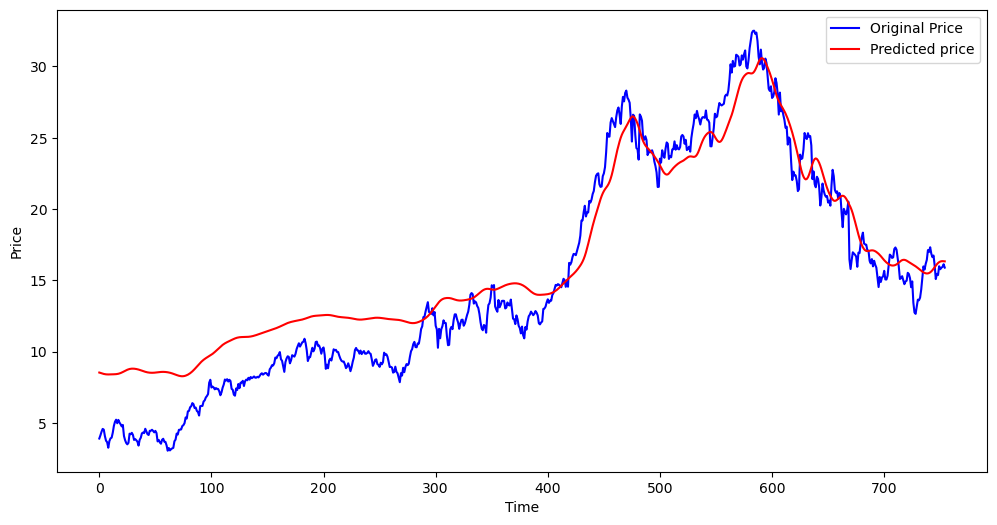

In [150]:
plt.figure(figsize=(12,6))
plt.plot(y_test, 'b', label = 'Original Price')
plt.plot(y_predicted, 'r', label = 'Predicted price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()